# Example with CopperMountain Model M5180 vector network analyzer

In [1]:
import qcodes as qc
from qcodes import Station, load_or_create_experiment, \
    initialise_database, Measurement
from qcodes.dataset.plotting import plot_by_id
from qcodes.utils.dataset.doNd import do1d

Logging hadn't been started.
Activating auto-logging. Current session state plus future input saved.
Filename       : C:\Users\G-GRE-GRE058050\.qcodes\logs\command_history.log
Mode           : append
Output logging : True
Raw input log  : False
Timestamping   : True
State          : active
Qcodes Logfile : C:\Users\G-GRE-GRE058050\.qcodes\logs\210330-113772-qcodes.log


In [2]:
from qcodes_contrib_drivers.drivers.CopperMountain.M5180 import M5180

## Connecting to device

- Install connection software S2VN, download here: https://coppermountaintech.com/download-free-vna-software-and-documentation/
- Run the software and go to System > Misc Setup > Network Remote Control Settings and turn on HiSLIP Server

In [3]:
vna = M5180(name='vna', address='TCPIP0::localhost::hislip0::INSTR')

Connected to: CMT M5180 (serial:20107935, firmware:20.3.3/1) in 0.09s


In [4]:
# Let's look at all parameters
vna.print_readable_snapshot(update=True)

vna:
	parameter               value
--------------------------------------------------------------------------------
IDN                      :	{'vendor': 'CMT', 'model': 'M5180', 'serial': '201...
averages                 :	1 
averages_enabled         :	True 
averages_trigger_enabled :	True 
center                   :	1.0005e+09 (Hz)
data_transfer_format     :	ASC 
if_bandwidth             :	10000 (Hz)
nb_traces                :	4 
npts                     :	2001 
output                   :	True 
point_s11                :	Not available (('dB', 'rad'))
point_s12                :	Not available (('dB', 'rad'))
point_s21                :	Not available (('dB', 'rad'))
point_s22                :	Not available (('dB', 'rad'))
power                    :	-20 (dBm)
s11                      :	Not available (('dB', 'rad'))
s12                      :	Not available (('dB', 'rad'))
s21                      :	Not available (('dB', 'rad'))
s22                      :	Not available (('dB', 'rad'))
span

# Setup db and station for test measurerment

In [5]:
# create an empty database based on the config file
qc.initialise_or_create_database_at('./test_copper_mountain.db')

In [6]:
exp = load_or_create_experiment(experiment_name='testing_coppermountain_driver',
                          sample_name="band_pass_filter")

In [7]:
station = qc.Station(vna)

## Measure a trace

In [8]:
# Turn on the RF output
vna.output('on')

Starting experimental run with id: 2. 


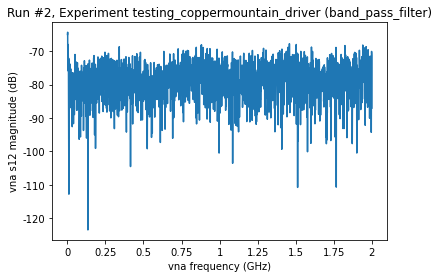

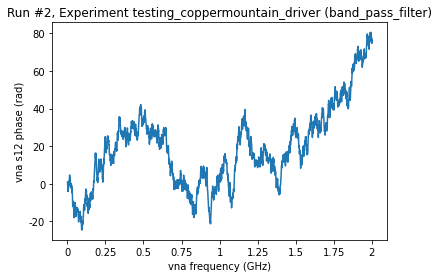

In [9]:
# define sweep parameters
vna.power(-20)
vna.start(1e6)
vna.stop(2e9)
vna.if_bandwidth(10e3)
vna.npts(2001)
vna.averages(1)
# do measurement
meas = Measurement()
meas.register_parameter(vna.s12)
with meas.run() as datasaver:
    datasaver.add_result((vna.s12, vna.s12()))
ax, cbax = plot_by_id(datasaver.run_id)

In [10]:
# Similarly, other S-paramters can be queried
vna.s11()

(array([-0.0477012 , -0.09391321, -0.17265479, ..., -0.03038562,
        -0.03399903, -0.0214076 ]),
 array([-0.01097229, -0.01708669, -0.01996385, ..., -3.17442979,
        -3.17352842, -3.17585808]))

In [11]:
vna.s12()

(array([-64.03521817, -72.72068274, -74.92402692, ..., -77.23523101,
        -77.87500527, -86.19919018]),
 array([ -1.46406748,  -3.23681928,  -2.86312445, ..., -47.37145838,
        -48.20720528, -45.34542698]))

In [12]:
vna.s21()

(array([-77.09130151, -72.57583366, -74.71111513, ..., -69.62992638,
        -86.6484703 , -72.85211098]),
 array([-1.80363488, -0.96240925, -0.83102692, ..., 32.98620611,
        34.25529117, 36.06598604]))

In [13]:
vna.s22()

(array([ 0.00305115, -0.06177799, -0.15385378, ..., -0.02385243,
        -0.02926526, -0.02279546]),
 array([-0.01547223, -0.02163175, -0.02391645, ..., -3.18152415,
        -3.18361572, -3.18402174]))

In [14]:
# or all S-parameters at once. Attention this is not a qcodes parameter
vna.get_s()

(array([1.0000000e+06, 1.9995000e+06, 2.9990000e+06, ..., 1.9980010e+09,
        1.9990005e+09, 2.0000000e+09]),
 array([-0.03160302, -0.10392121, -0.17598948, ..., -0.02083835,
        -0.02544277, -0.02948864]),
 array([-0.01215209, -0.01844561, -0.01988006, ...,  3.11017192,
         3.10721224,  3.10526495]),
 array([-68.03181706, -69.96986101, -84.366874  , ..., -70.94278538,
        -79.11469549, -77.38634014]),
 array([ 2.24117547,  2.60915241,  0.78312326, ..., -2.20522653,
        -2.38599278, -1.49447507]),
 array([-83.2538078 , -67.23946765, -73.17241871, ..., -75.89235284,
        -80.80017483, -81.72715481]),
 array([ 3.1331486 ,  2.56154342, -0.36192594, ...,  0.23860211,
        -1.37759455,  2.75163547]),
 array([ 0.00655536, -0.06872062, -0.14529468, ..., -0.02987041,
        -0.01884765, -0.02839042]),
 array([-0.01384824, -0.02119365, -0.02357165, ...,  3.10193855,
         3.10032872,  3.09917688]))

# Look at the names and the labels of the Sxx parameters

In [15]:
vna.s11.labels

('vna s11 magnitude', 'vna s11 phase')

In [16]:
vna.s11.names

('vna_s11_magnitude', 'vna_s11_phase')

In [17]:
vna.s11.setpoint_labels

(('vna frequency',), ('vna frequency',))

In [18]:
vna.s11.setpoint_names

(('vna_frequency',), ('vna_frequency',))